## Modules Import

In [1]:
import sys
import os

# Get project root (one level above 'notebooks')
project_root = os.path.abspath(os.path.join(os.getcwd(), "../../"))

if project_root not in sys.path:
    sys.path.append(project_root)

import lightning as pl
from pathlib import Path
from data.loaders import get_dataset, get_dataloader
from utils.config_loader import load_hydra_config
from models.light.model import FastFlowerClassifier
from utils.utils import get_pretrained_transforms
from visualization.plots import (
    display_sample_images,
    plot_batch_class_distribution,
    plot_metric
)


## Configuration Paths

In [2]:
data_config_path = Path("../configs/data")
model_config_path = Path("../configs/model/light")

## Data & Model configurations with hydra

In [3]:
data_configs = load_hydra_config(data_config_path, "data_configs.yaml")
model_configs = load_hydra_config(model_config_path, "model_configs.yaml")

## Dataset Transformers

In [4]:
train_transforms = get_pretrained_transforms()

## Small subset of the data

In [5]:
root_dir = project_root / Path(data_configs.dataset.processed_dir)

In [6]:
mode = 'train'

In [7]:
dataset = get_dataset(
    root_dir=root_dir,
    mode=mode,
    transforms=train_transforms,
    target_transforms=None,
    num_instances=20
)

## Dataloader

In [8]:
data_loader = get_dataloader(dataset=dataset, mode=mode, cfg=data_configs)

## Data samples plot

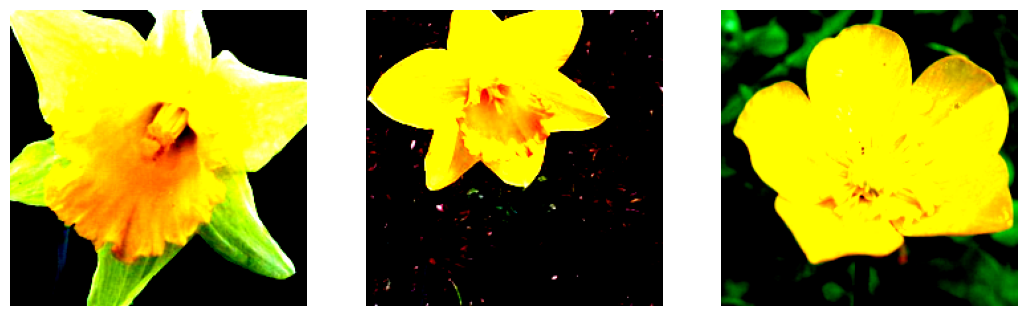

In [9]:
display_sample_images(dataloader=data_loader, num_images=3)

## Class distribution over selected batch

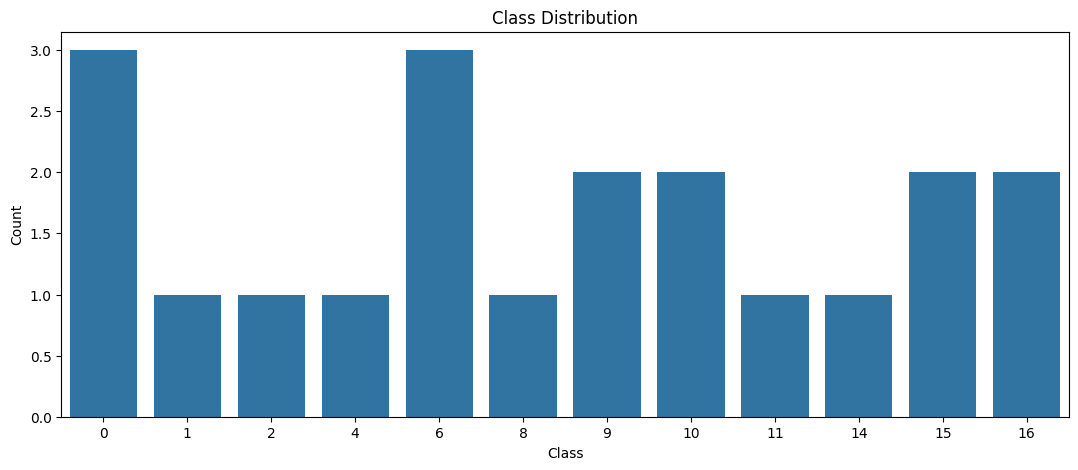

In [10]:
plot_batch_class_distribution(data_loader)

## Initialize light classifier

In [11]:
light_classifier = FastFlowerClassifier(model_configs)

## Lightning Trainer

In [12]:
trainer = pl.Trainer(max_epochs=model_configs.epochs, devices=1)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


## Fit the classifier over the small subset

In [13]:
trainer.fit(light_classifier, train_dataloaders=data_loader)

C:\Users\mwaff\anaconda3\envs\flower_cls_env\Lib\site-packages\lightning\pytorch\trainer\configuration_validator.py:70: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type             | Params | Mode 
--------------------------------------------------------
0 | classifier | Sequential       | 1.0 M  | train
1 | loss_fn    | CrossEntropyLoss | 0      | train
--------------------------------------------------------
93.9 K    Trainable params
927 K     Non-trainable params
1.0 M     Total params
4.084     Total estimated model params size (MB)
215       Modules in train mode
0         Modules in eval mode
C:\Users\mwaff\anaconda3\envs\flower_cls_env\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoad

Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=32` reached.


## Loss & accuracy

In [14]:
train_loss = [output["loss"] for output in light_classifier.epoch_outputs["train"]]
train_acc = [output["accuracy"] * 100 for output in light_classifier.epoch_outputs["train"]]

## Loss plot

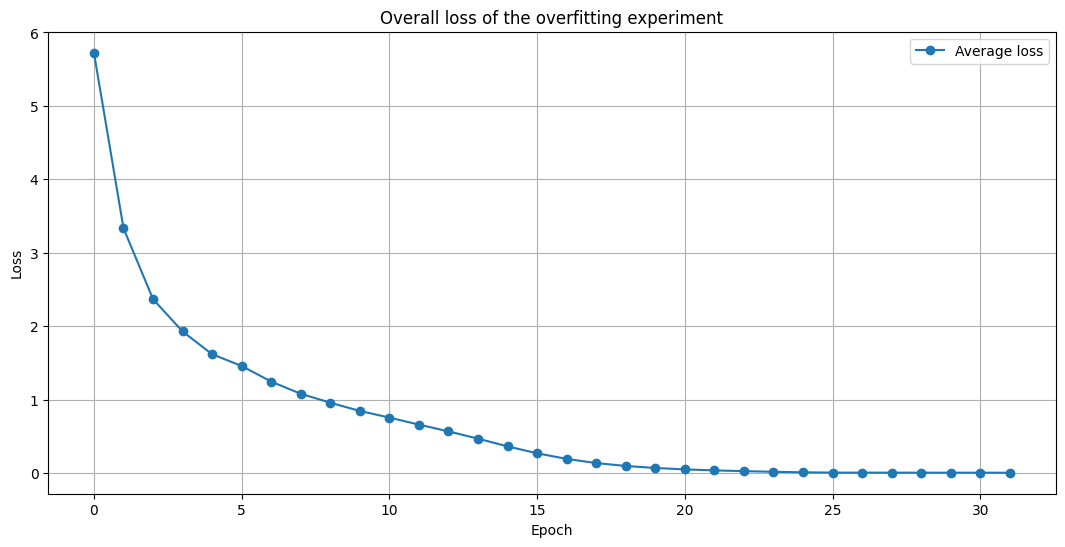

In [15]:
plot_metric(results={"Average loss": train_loss}, title="Overall loss of the overfitting experiment", xlabel="Epoch", ylabel="Loss")

## Accuracy plot

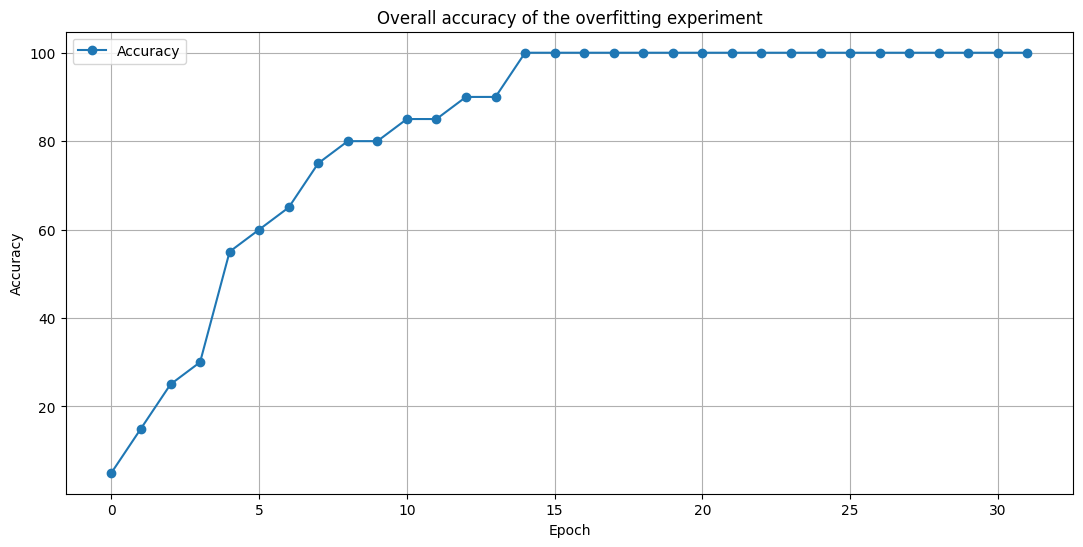

In [16]:
plot_metric(results={"Accuracy": train_acc}, title="Overall accuracy of the overfitting experiment", xlabel="Epoch", ylabel="Accuracy")